# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 600
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import matplotlib.pyplot as plt
# Set default font size
plt.rcParams['font.size'] = 24
import seaborn as sb
# Set default font size
sb.set(font_scale = .8)
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sb.set_style("white", rc=custom_style)


# Interactive Visualizations
# import plotly.plotly as py
# import plotly.graph_objs as go
# from plotly.offline import iplot, init_notebook_mode
# init_notebook_mode(connected=True)

# import cufflinks as cf
# cf.go_offline(connected=True)
# icf.set_config_file(theme='white')

# Analysis/Modeling
Do work here

In [30]:
f1 = '../../../dataset/4_McNemar_PDX/OmicsBinary_StackingCVClassifier_mutCross+clin+exprPROGENyHALLMARKS+highCNagg+MethK5cluster_perfTab.tsv'
df1 = pd.read_csv(f1, sep='\t', header=0, index_col=0)
df1['test_set'] = ['full']*len(df1)
f2 = '../../../dataset/4_McNemar_PDX/tripleNegONLY_OmicsBinary_StackingCVClassifier_mutCross+clin+exprPROGENyHALLMARKS+highCNagg+MethK5cluster_perfTab.tsv'
df2 = pd.read_csv(f2, sep='\t', header=0, index_col=0)
df2['test_set'] = ['tripleNegOnly']*len(df2)
performance_df = pd.concat([df1, df2])

In [31]:
performance_df

,split_index,model_name,grid_test_accu,AUC,true_PD__pred_PD,true_PD__pred_SD-OR,true_SD-OR__pred_PD,true_SD-OR__pred_SD-OR,test_set
0,0,stackedCVClassifier,0.785714,0.847256,26,7,8,29,full
1,0,rawL1elasticnet,0.728571,0.790336,20,13,6,31,full
2,0,KRAS_BRAF_NRAS_triple_neg,0.857143,0.851761,25,8,2,35,full
3,0,DIABLO_sPLS-DA,0.728571,0.720311,19,14,5,32,full
4,1,stackedCVClassifier,0.814286,0.856675,25,8,5,32,full
...,...,...,...,...,...,...,...,...,...
35,8,DIABLO_sPLS-DA,0.666667,0.511111,2,7,6,24,tripleNegOnly
36,9,stackedCVClassifier,0.720930,0.586364,4,6,6,27,tripleNegOnly
37,9,rawL1elasticnet,0.674419,0.660606,2,8,6,27,tripleNegOnly
38,9,KRAS_BRAF_NRAS_triple_neg,0.767442,0.500000,0,10,0,33,tripleNegOnly


# Results
Show graphs and stats here

### visualise model AUC on training set across replicates

Text(0.5, 1.0, 'Full test set (N=57) ROC AUC across 10 replicates')

(0.45, 0.9)

/Users/umberto.perron/anaconda3/envs/PDx_py/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/Users/umberto.perron/anaconda3/envs/PDx_py/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/Users/umberto.perron/anaconda3/envs/PDx_py/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'TripleNegOnly test set (N=40) ROC AUC across 10 replicates')

(0.45, 0.9)

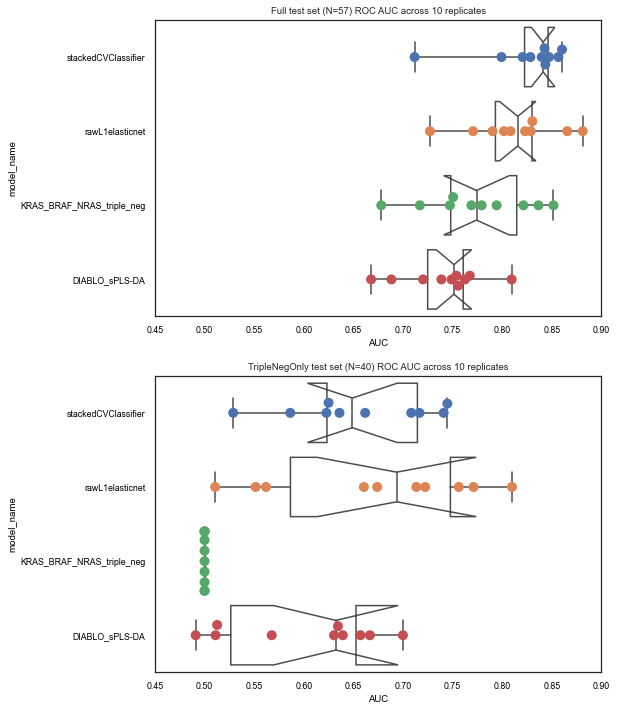

In [73]:
fig, axes = plt.subplots(2,1, figsize=(8,12))
ax1, ax2 = axes
ax1 = sb.boxplot(x="AUC", y="model_name", 
	notch=True, 
	data=df1, 
	boxprops={'facecolor':'None'}, 
	whis=np.inf, ax=ax1)
ax1 = sb.swarmplot(x="AUC", y="model_name", 
	data=df1,  s=10, ax=ax1)
ax1.set_title(f'Full test set (N=57) ROC AUC across 10 replicates')
ax1.set_xlim(.45,.9)
#fig = ax.get_figure()
#fig.savefig('aggROCAUC_boxswarm_test.pdf', format='pdf', bbox_inches='tight') 

ax2 = sb.boxplot(x="AUC", y="model_name", 
	notch=True, 
	data=df2, 
	boxprops={'facecolor':'None'}, 
	whis=np.inf, ax=ax2)
ax2 = sb.swarmplot(x="AUC", y="model_name", 
	data=df2, s=10, ax=ax2)
ax2.set_title(f'TripleNegOnly test set (N=40) ROC AUC across 10 replicates')
ax2.set_xlim(.45,.9)
#fig = ax.get_figure()
fig.savefig('aggROCAUC_Full+TripleNegOnly_boxswarm_test.pdf', 
	format='pdf', bbox_inches='tight') 

### visualise model accuracy on training set across replicates

Text(0.5, 1.0, 'Full test set (N=57) prediction accuracy across 10 replicates')

(0.45, 0.9)

Text(0.5, 1.0, 'TripleNegOnly test set (N=40) prediction accuracy across 10 replicates')

(0.45, 0.9)

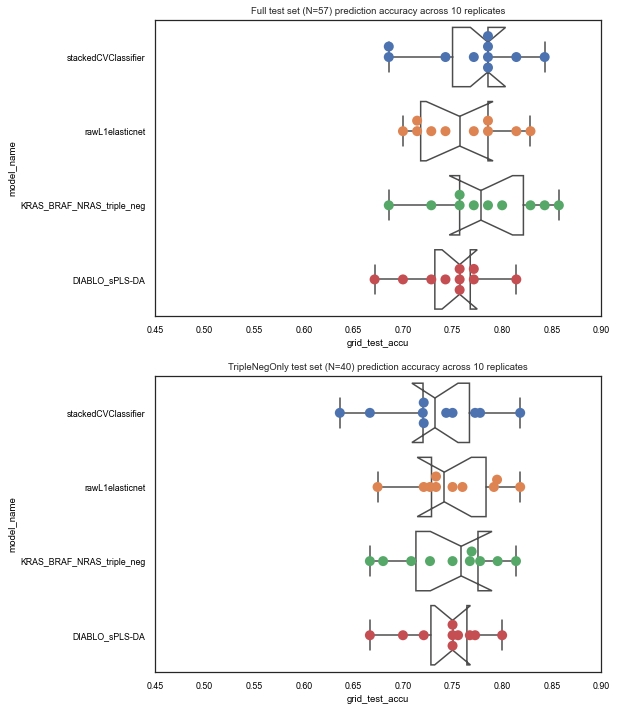

In [74]:
fig, axes = plt.subplots(2,1, figsize=(8,12))
ax1, ax2 = axes
ax1 = sb.boxplot(x="grid_test_accu", y="model_name", 
	notch=True, 
	data=df1, 
	boxprops={'facecolor':'None'}, 
	whis=np.inf, ax=ax1)
ax1 = sb.swarmplot(x="grid_test_accu", y="model_name", 
	data=df1, s=10, ax=ax1)
ax1.set_title(f'Full test set (N=57) prediction accuracy across 10 replicates')
ax1.set_xlim(.45,.9)
#fig = ax.get_figure()
#fig.savefig('aggROCAUC_boxswarm_test.pdf', format='pdf', bbox_inches='tight') 

ax2 = sb.boxplot(x="grid_test_accu", y="model_name", 
	notch=True, 
	data=df2, 
	boxprops={'facecolor':'None'}, 
	whis=np.inf, ax=ax2)
ax2 = sb.swarmplot(x="grid_test_accu", y="model_name", 
	data=df2, s=10, ax=ax2)
ax2.set_title(f'TripleNegOnly test set (N=40) prediction accuracy across 10 replicates')
ax2.set_xlim(.45,.9)
#fig = ax.get_figure()
fig.savefig('aggACCU_Full+TripleNegOnly_boxswarm_test.pdf', 
	format='pdf', bbox_inches='tight') 

Text(0.5, 1.0, 'test set (N=57) prediction accuracy across 10 replicates')

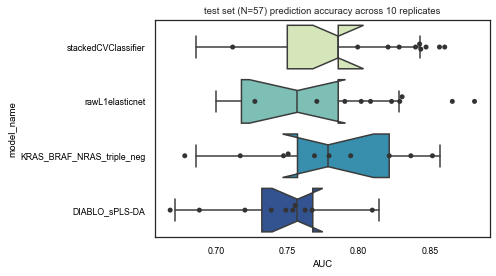

In [4]:
ax = sb.boxplot(x="grid_test_accu", y="model_name", 
	notch=True, palette='YlGnBu',
	data=performance_df, whis=np.inf)
ax = sb.swarmplot(x="AUC", y="model_name", 
	data=performance_df, color=".2")
ax.set_title('test set (N=57) prediction accuracy across 10 replicates')
fig = ax.get_figure()
fig.savefig('aggAccu_boxswarm_test.pdf', format='pdf', bbox_inches='tight') 

### aggregate replicate confusion matrices by mean and visualise as heatmap

In [10]:
def agg_confMatrix(df):
	aggAvg_confMatrix = pd.DataFrame(np.array([[df['true_PD__pred_PD'].mean(),
			df['true_PD__pred_SD-OR'].mean()],
			[df['true_SD-OR__pred_PD'].mean(),
			df['true_SD-OR__pred_SD-OR'].mean()]]), 
			columns=['pred_PD', 'pred_SD-OR'],
			index=['true_PD', 'true_SD-OR'])
	return aggAvg_confMatrix
DIABLO_aggAvg_confMatrix = agg_confMatrix(performance_df[performance_df.model_name == 'DIABLO_sPLS-DA'])
stacked_aggAvg_confMatrix = agg_confMatrix(performance_df[performance_df.model_name == 'stackedCVClassifier'])
rawL1elasticnet_aggAvg_confMatrix = agg_confMatrix(performance_df[performance_df.model_name == 'rawL1elasticnet'])
tripleNeg_aggAvg_confMatrix = agg_confMatrix(performance_df[performance_df.model_name == 'KRAS_BRAF_NRAS_triple_neg'])  

Text(0.5, 1.0, 'StackingCVClassifier test set (N=57) mean confusion matrix across 10 replicates')

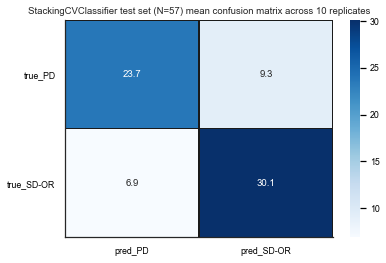

In [7]:
ax = sb.heatmap(stacked_aggAvg_confMatrix, 
		annot=True, 
		fmt=".1f", 
		linewidths=.5,
		cmap='Blues',
		linecolor='k')
sb.despine(ax=ax, offset=0) # show axes to close heatmap border
ax.set_title('StackingCVClassifier test set (N=57) mean confusion matrix across 10 replicates')
fig = ax.get_figure()
fig.savefig('aggconfMatrix_heatmap_StackingCVClassifier_test.pdf', format='pdf', bbox_inches='tight') 


Text(0.5, 1.0, 'KRAS_BRAF_NRAS_triple_neg test set (N=57) mean confusion matrix across 10 replicates')

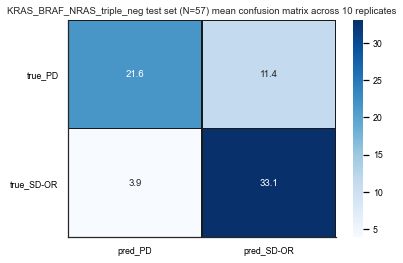

In [8]:
ax = sb.heatmap(tripleNeg_aggAvg_confMatrix, 
		annot=True, 
		fmt=".1f", 
		linewidths=.5,
		cmap='Blues',
		linecolor='k')
sb.despine(ax=ax, offset=0) # show axes to close heatmap border
ax.set_title('KRAS_BRAF_NRAS_triple_neg test set (N=57) mean confusion matrix across 10 replicates')
fig = ax.get_figure()
fig.savefig('aggconfMatrix_heatmap_KRAS_BRAF_NRAS_triple_neg_test.pdf', format='pdf', bbox_inches='tight') 

Text(0.5, 1.0, 'rawL1elasticnet test set (N=57) mean confusion matrix across 10 replicates')

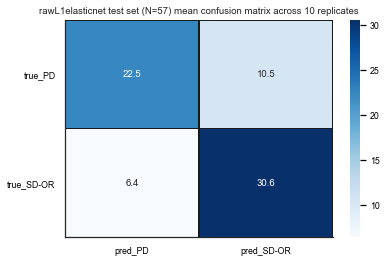

In [9]:
ax = sb.heatmap(rawL1elasticnet_aggAvg_confMatrix, 
		annot=True, 
		fmt=".1f", 
		linewidths=.5,
		cmap='Blues',
		linecolor='k')
sb.despine(ax=ax, offset=0) # show axes to close heatmap border
ax.set_title('rawL1elasticnet test set (N=57) mean confusion matrix across 10 replicates')
fig = ax.get_figure()
fig.savefig('aggconfMatrix_heatmap_rawL1elasticnet_test.pdf', format='pdf', bbox_inches='tight') 

Text(0.5, 1.0, 'DIABLO_sPLS-DD test set (N=57) mean confusion matrix across 10 replicates')

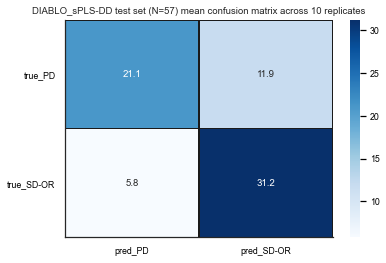

In [11]:
ax = sb.heatmap(DIABLO_aggAvg_confMatrix, 
		annot=True, 
		fmt=".1f", 
		linewidths=.5,
		cmap='Blues',
		linecolor='k')
sb.despine(ax=ax, offset=0) # show axes to close heatmap border
ax.set_title('DIABLO_sPLS-DD test set (N=57) mean confusion matrix across 10 replicates')
fig = ax.get_figure()
fig.savefig('aggconfMatrix_heatmap_DIABLO_sPLS-DA_test.pdf', format='pdf', bbox_inches='tight') 

# Conclusions and Next Steps
Summarize findings here